# Nanocylinder AFM tip damping measurements on test fluids
### Viscosity standards purchased from Cannon Instrument Company and their viscosities:
1. N100 - 202 mPa s
2. N350 - 600 mPa s
3. S2000 - 4700 mPa s



## 0. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import glob
import scipy

## 1. Gather data, plot all the retraction curves


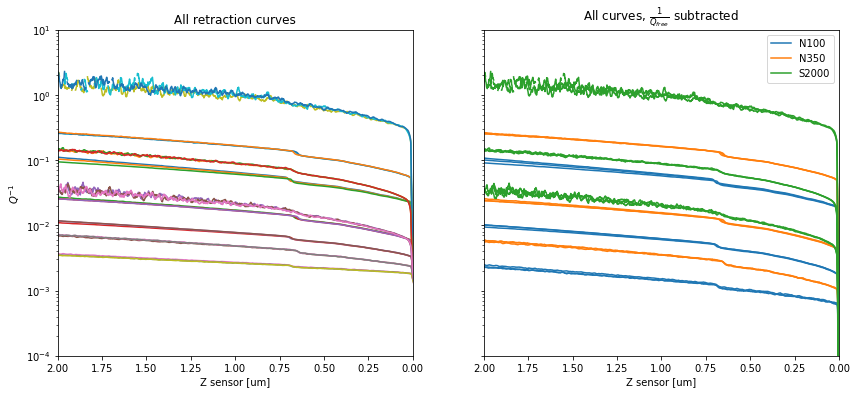

In [3]:
# Gather .txt filepaths using glob, and extract column names
files = glob.glob('./NanoneedleDART/*')
dfs = [1]*len(files)
columns = pd.read_csv(files[0], sep=' ').columns.tolist()

# Make columns names uniform
for x in range(len(columns)):
    columns[x] = columns[x].replace('FNN1_N100_1_0001','')
    
# Read files with pandas, plot each retraction curve with separation point at z=0
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), sharex='all', sharey='all')
colors = ['C0']*9+['C1']*9+['C2']*9

for x in range(len(files)):
    dfs[x] = pd.read_csv(files[x], sep=' ')
    dfs[x].columns = columns
    
    # Offset all traces by the point of release on retraction
    k = len(dfs[x])-2
    while np.abs(dfs[x].AmpV_Ret[k] - dfs[x].AmpV_Ret[k-1]) < 0.0008:
        k = k-1
    d = dfs[x].ZSnsr_Ret[k]
    dfs[x].ZSnsr_Ext -= d
    dfs[x].ZSnsr_Ret -= d
    # Rolling average number to take, carries into following cells
    nroll = 10
    ax1.semilogy(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QFac_Ret.rolling(nroll,center=True).mean())
    
    # Subtract free cantilever damping in air (i.e. 1/Qfree) from all traces to isolate liquid damping
    Qfree = dfs[x].QFac_Ret[-10:-1].mean()
    dfs[x]['QCorr'] = 1/(1/dfs[x].QFac_Ret-1/Qfree)
    ax2.semilogy(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QCorr.rolling(nroll,center=True).mean(),color=colors[x])

    
ax1.set_xlim(2,0)
ax1.set_ylim(1e-4,10)
ax1.set_ylabel('$Q^{-1}$')
ax1.set_xlabel('Z sensor [um]')
ax2.set_xlabel('Z sensor [um]')
ax1.set_title('All retraction curves')
ax2.set_title(r'All curves, $\frac{1}{Q_{free}}$ subtracted')
legend_elements = [Line2D([0], [0], color='C0', label='N100'),
                   Line2D([0], [0], color='C1', label='N350'),
                   Line2D([0], [0], color='C2', label='S2000')]
ax2.legend(handles = legend_elements)

## 2. Separate curves by viscosity, normalize by viscosity (Figure S3)

Text(0, 0.5, '$\\frac{Q^{-1}}{\\eta}$')

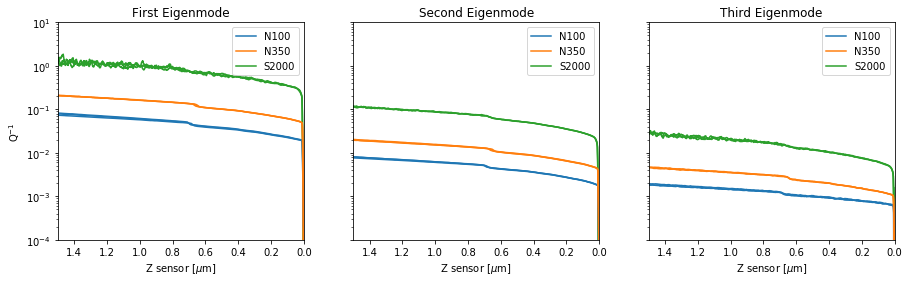

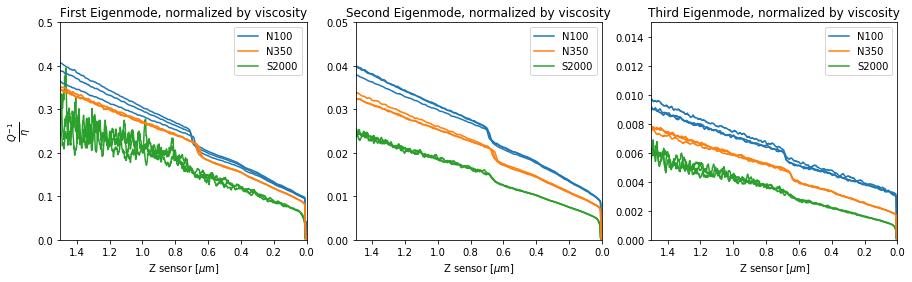

<Figure size 432x288 with 0 Axes>

In [5]:
fig, axs = plt.subplots(1,3, figsize = (15,4), sharex = 'all', sharey='all')

for x in [18,19,20,0,1,2,9,10,11]:
    axs[0].semilogy(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QCorr.rolling(nroll, center=True).mean(), color=colors[x])

for x in [21,22,23,3,4,5,12,13,14]:
    axs[1].semilogy(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QCorr.rolling(nroll, center=True).mean(), color=colors[x])

for x in [24,25,26,6,7,8,15,16,17]:
    axs[2].semilogy(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QCorr.rolling(nroll, center=True).mean(), color=colors[x])
    
axs[0].set_ylim(0.0001,10)
axs[0].set_xlim(1.5,0)
axs[0].set_xlabel('Z sensor [$\mu$m]')
axs[0].set_ylabel('Q$^{-1}$')
axs[0].set_title('First Eigenmode')
axs[1].set_xlabel('Z sensor [$\mu$m]')
axs[1].set_title('Second Eigenmode')
axs[2].set_xlabel('Z sensor [$\mu$m]')
axs[2].set_title('Third Eigenmode')
legend_elements = [Line2D([0], [0], color='C0', label='N100'),
                   Line2D([0], [0], color='C1', label='N350'),
                   Line2D([0], [0], color='C2', label='S2000')]
axs[0].legend(handles = legend_elements)
axs[1].legend(handles = legend_elements)
axs[2].legend(handles = legend_elements)
# fig.tight_layout()
# plt.savefig('./figures/NanoneedleDARTbyEigenmodeRet0.png', dpi=300)
# fig.savefig('./figures/Q_depth.svg')

fig, axs = plt.subplots(1,3, figsize = (15,4),sharex='all')

#First eigenmode only, normalized by viscosity
viscs = [.202]*9+[.600]*9+[4.70]*9
for x in [18,19,20,0,1,2,9,10,11]:
    axs[0].plot(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QCorr.rolling(nroll, center=True).mean()/viscs[x], color=colors[x])
axs[0].set_ylim(0,0.5)
axs[0].set_title('First Eigenmode, normalized by viscosity')
axs[0].set_xlim(0,2)
plt.figure()
#Second eigenmode only, normalized by viscosity
for x in [21,22,23,3,4,5,12,13,14]:
    axs[1].plot(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QCorr.rolling(nroll, center=True).mean()/viscs[x], color=colors[x])
axs[1].set_title('Second Eigenmode, normalized by viscosity')
axs[1].set_ylim(0,0.05)
        

#Third eigenmode only, normalized by viscosity
for x in [24,25,26,6,7,8,15,16,17]:
    axs[2].plot(dfs[x].ZSnsr_Ret*1e6, 1/dfs[x].QCorr.rolling(nroll, center=True).mean()/viscs[x], color=colors[x])
axs[2].set_title('Third Eigenmode, normalized by viscosity')
axs[2].set_ylim(0,.015)
axs[0].set_xlim(1.5,0)
axs[0].legend(handles = legend_elements)
axs[1].legend(handles = legend_elements)
axs[2].legend(handles = legend_elements)
axs[0].set_xlabel('Z sensor [$\mu$m]')
axs[1].set_xlabel('Z sensor [$\mu$m]')
axs[2].set_xlabel('Z sensor [$\mu$m]')
axs[0].set_ylabel(r'$\frac{Q^{-1}}{\eta}$', fontsize =14)
# fig.savefig('./figures/Q_depth_normalized.svg')
# fig.savefig('./figures/Q_depth_normalized.png')

## 3. Linear fit to $Q^{-1}(L)$ and bar graphs

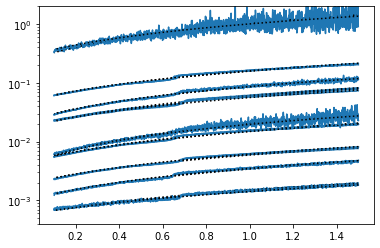

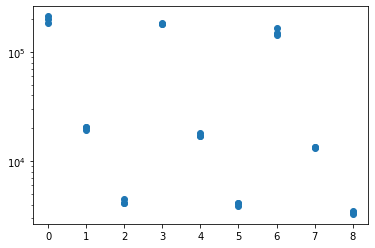

In [9]:
slopes = np.empty(len(dfs))
for i in range(len(dfs)):
    x = dfs[i].ZSnsr_Ret
    
    y = dfs[i].QCorr
    y = y[(x<1.5e-6) & (x>1e-7)]
    x = x[(x<1.5e-6) & (x>1e-7)]
    
    plt.semilogy(x*1e6,1/y,'C0')
    plt.ylim(4e-4,2)
    fitparams = np.polyfit(x,1/y,1)
    slopes[i] = fitparams[0]
    plt.plot(x*1e6,x*fitparams[0]+fitparams[1],'k:')
plt.figure()
plt.semilogy(np.floor(np.arange(27)/3),slopes/viscs,'o')
avgs = np.empty(int(len(slopes)/3))
stds = np.empty(int(len(slopes)/3))
for k in range(len(avgs)):
    avgs[k] = np.mean([slopes[k*3:k*3+3]])
    stds[k] = np.std([slopes[k*3:k*3+3]])
# print(avgs)
# print(stds)


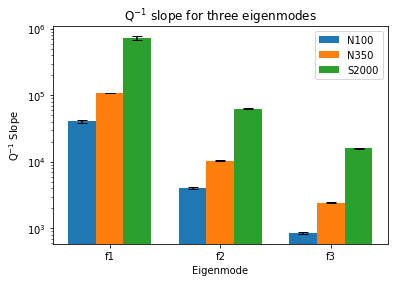

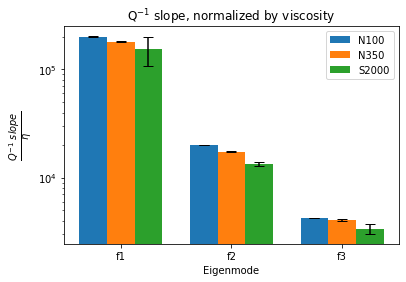

In [8]:
labels = ['f1','f2','f3']
N100 = avgs[0:3]
N350 = avgs[3:6]
S2000 = avgs[6:9]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, N100, width, label='N100',yerr = stds[0:3],capsize=5)
rects2 = ax.bar(x, N350, width, label='N350',yerr = stds[3:6],capsize=5)
rects3 = ax.bar(x + width, S2000, width, label='S2000',yerr = stds[6:9],capsize=5)

ax.set_title('Q$^{-1}$ slope for three eigenmodes')
ax.set_ylabel('Q$^{-1}$ Slope')
ax.set_xlabel('Eigenmode')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()
# fig.savefig('./figures/QslopeBar.svg')

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, N100/.202, width, label='N100',yerr = stds[0:3],capsize=5)
rects2 = ax.bar(x, N350/.6, width, label='N350',yerr = stds[3:6],capsize=5)
rects3 = ax.bar(x + width, S2000/4.70, width, label='S2000',yerr = stds[6:9],capsize=5)

ax.set_title('Q$^{-1}$ slope, normalized by viscosity')
ax.set_ylabel(r'$\frac{Q^{-1}\/\/slope}{\eta}$', fontsize = 14)
ax.set_xlabel('Eigenmode')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale('log')
ax.legend()
# fig.savefig('./figures/QslopeNormBar.svg')